# Exploratory data analysis (EDA): Waze Churn Prevention Project
**Background on the Waze Scenario:**

Waze's free navigation app simplifies travel for drivers worldwide. The collaborative effort of map editors, beta testers, translators, partners, and users ensures each journey is optimized for safety and efficiency. Collaborations with cities, transportation authorities, broadcasters, businesses, and first responders further Waze's commitment to facilitating safer and more efficient travel experiences.

In this project, **our primary objective** is to conduct comprehensive exploratory data analysis, encompassing data cleaning and the creation of visual plots to elucidate variables and their relationships.

The project employs a dataset titled 'waze_dataset.csv,' meticulously curated through a partnership between Google and Waze, containing synthetic data exclusively generated for this collaborative initiative.

**Key dataset specifications:**

* 14,999 rows – signifying unique user entries
* 12 columns, capturing essential data variables

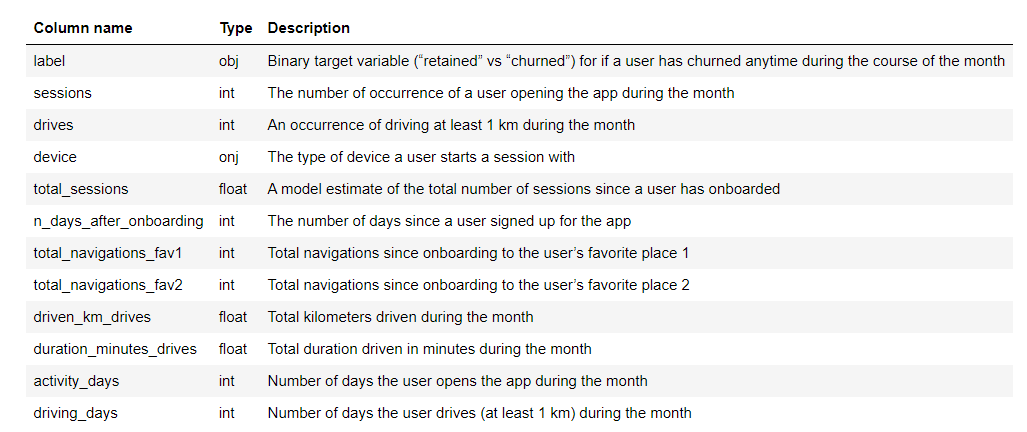
    
**Question to solve:** 

1. What types of distributions did you notice in the variables? What did this tell you about the data?
2. Was there anything that led you to believe the data was erroneous or problematic in any way? 
3. What percentage of users churned and what percentage were retained?
4. What factors correlated with user churn? How? 
5. Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?

##  Imports and data loading
For EDA of the data, I imported the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.

In [2]:
# Import statements, packages and/or libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

Read the data and store it as a dataframe object called df.

In [2]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

## Data exploration and cleaning
At this point we must ask the following questions to explore and clean the data:
1.  Which columns of data are the most important?

2.  Which data columns can you eliminat?

3.  How would you check for missing data? And how would you handle missing data (if any)?

4.  How would you check for outliers? And how would handle outliers (if any)?

In [3]:
#View of the first rows of the dataframe
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [4]:
# We must know the shape and size of our data.
print('We have a total of data of: ' +  str(df.size))
print('We have {} columns and  {} rows'.format(df.shape[1],df.shape[0]))

We have a total of data of: 194987
We have 13 columns and  14999 rows


In [5]:
# Generate summary statistics using the describe() method.
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [6]:
# Summary information using the info() method.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


Going back to the questions asked before:
1.  Which columns of data are the most important?
    * The most useful columns will be 'drives' and 'sessions', keeping  in mind with our goal in this project.
2.  Which data columns can you eliminate?
    * Right now the columns 'total_navigations_fav1' and 'total_navigations_fav2' don't make sense to us.
3.  How would you check for missing data? And how would you handle missing data (if any)?
    * We can check for missing data using the function isna(), and we should analyse this data to know how can we deal with. In this dataframe the missing values belong to 'label' columns whose description is ' Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month' 
    
4.  How would you check for outliers? And how would handle outliers (if any)?
    * The ourliers must be checked using boxplot and known the limits to applicate. According to the statistics. 

### Missing values:
We must first discover the missing values to determine: what should we do with these missing rows?

In [7]:
#Make a copy of dataframe to don't change the raw data
df0 = df.copy()

In [8]:
#Identify the missing values using isna() and .sum() functions
df0.isna().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In this dataframe the missing values belong to 'label' columns whose description is ' Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month'.

Due the missing data represents less than 5% of the data, we will remove these values to display properly.

In [9]:
#Drop the missing values of raw data
df0 = df.dropna(axis = 0)
#Check the new dataframe
df0.isna().sum()

ID                         0
label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64

### Visualizations to uncover information

#### sessions column
The number of occurrence of a user opening the app during the month

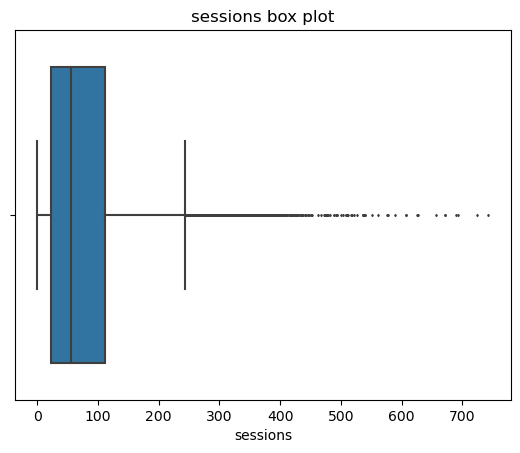

In [11]:
# Box plot
sns.boxplot(x=df0['sessions'], fliersize=1)
plt.title('sessions box plot');

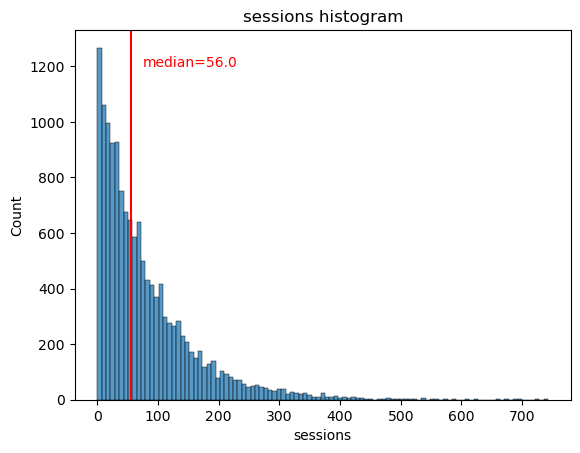

In [17]:
# Histogram
sns.histplot(df0['sessions'])
median = df0['sessions'].median()
plt.axvline(median, color='red', linestyle='-')
plt.text(75,1200, 'median=56.0', color='red')
plt.title('sessions histogram');

**Note:** A skewed histogram has a longer tail on one side than the other. A right-skewed histogram has a longer tail on the right side, 
indicating that there are more data points on the left side of the histogram.

The sessions variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### drives column
An occurrence of driving at least 1 km during the month

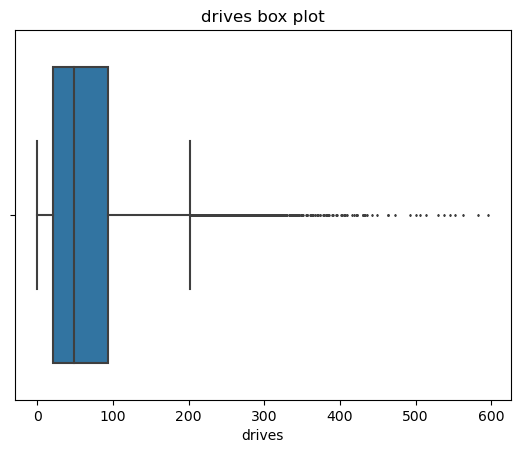

In [18]:
# Box plot
sns.boxplot(x=df0['drives'], fliersize=1)
plt.title('drives box plot');

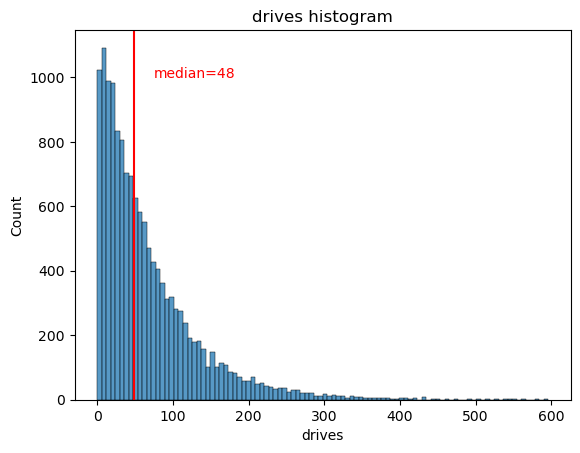

In [20]:
# Histogram
sns.histplot(df0['drives'])
median = df0['drives'].median()
plt.axvline(median, color='red', linestyle='-')
plt.text(75,1000, 'median=48', color='red')
plt.title('drives histogram');

The drives information follows a distribution similar to the sessions variable. It is right-skewed,  with a median of 48. However, some drivers had over 400 drives in the last month.

#### total_sessions column
A model estimate of the total number of sessions since a user has onboarded

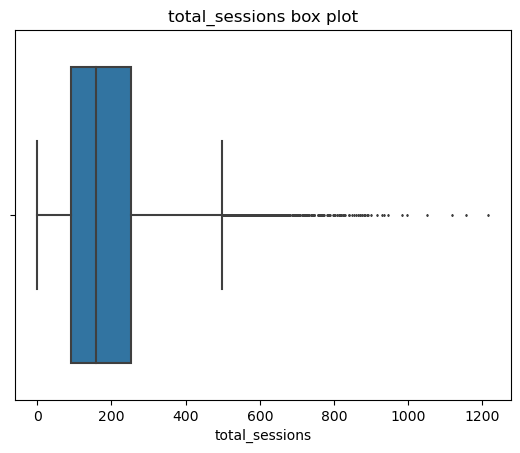

In [21]:
# Box plot
sns.boxplot(x=df0['total_sessions'], fliersize=1)
plt.title('total_sessions box plot');

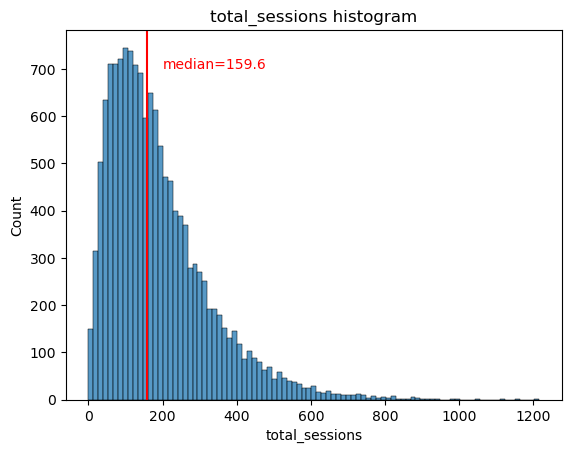

In [22]:
# Histogram
sns.histplot(df0['total_sessions'])
median = df0['total_sessions'].median()
plt.axvline(median, color='red', linestyle='-')
plt.text(200,700, 'median=159.6', color='red')
plt.title('total_sessions histogram');

The total_sessions is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month

#### n_days_after_onboarding column
The number of days since a user signed up for the app

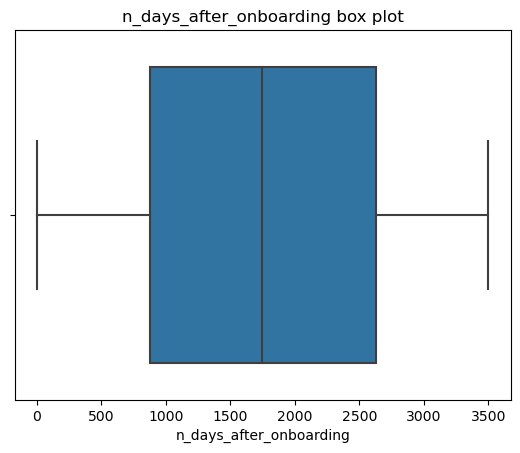

In [23]:
# Box plot
sns.boxplot(x=df0['n_days_after_onboarding'], fliersize=1)
plt.title('n_days_after_onboarding box plot');

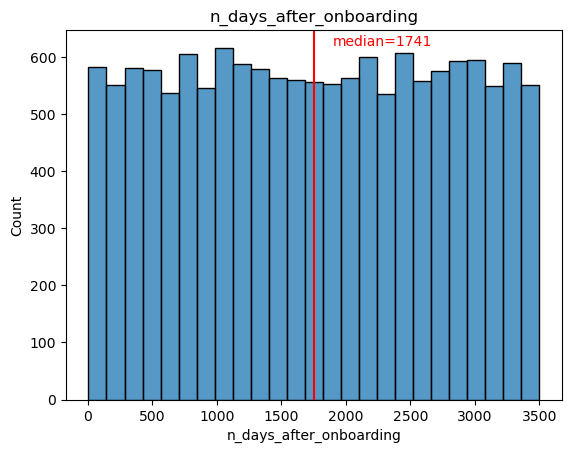

In [26]:
# Histogram
sns.histplot(df0['n_days_after_onboarding'])
median = df0['n_days_after_onboarding'].median()
plt.axvline(median, color='red', linestyle='-')
plt.text(1900,620, 'median=1741', color='red')
plt.title('n_days_after_onboarding');

The total user tenure (number of days since onboarding) is a uniform distribution with values ranging from near-zero to ~ 3,500 (~9.5 years).

#### driven_km_drives column
Total kilometers driven during the month

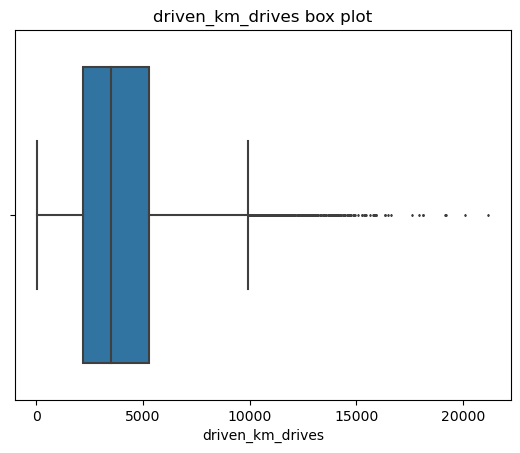

In [28]:
# Box plot
sns.boxplot(x=df0['driven_km_drives'], fliersize=1)
plt.title('driven_km_drives box plot');

21183.40189

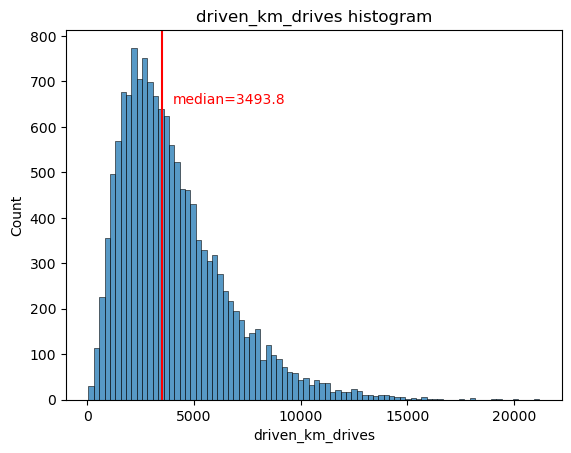

In [31]:
# Histogram
sns.histplot(df0['driven_km_drives'])
median = df0['driven_km_drives'].median()
plt.axvline(median, color='red', linestyle='-')
plt.text(4000,650, 'median=3493.8', color='red')
plt.title('driven_km_drives histogram');
df0['driven_km_drives'].max()

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. The longest distance driven in the month was over half the circumferene of the earth (21183 km)

#### duration_minutes_drives column
Total duration driven in minutes during the month

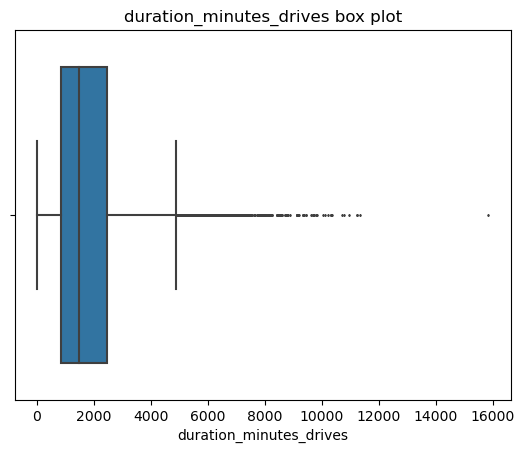

In [32]:
# Box plot
sns.boxplot(x=df0['duration_minutes_drives'], fliersize=1)
plt.title('duration_minutes_drives box plot');

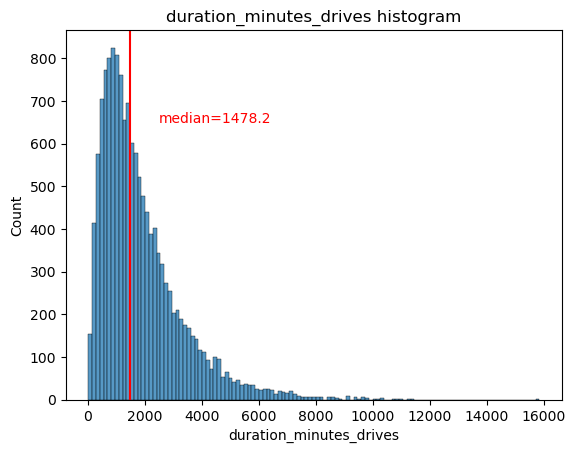

In [33]:
# Histogram
sns.histplot(df0['duration_minutes_drives'])
median = df0['duration_minutes_drives'].median()
plt.axvline(median, color='red', linestyle='-')
plt.text(2500,650, 'median=1478.2', color='red')
plt.title('duration_minutes_drives histogram');

The duration_minutes_drives variable has a heavily skewed right tail. Half of the users drove less than ~ 1,478 minutes (~25 hours), but some users clocked over 250 hours over the month.

#### activity_days column
Number of days the user opens the app during the month

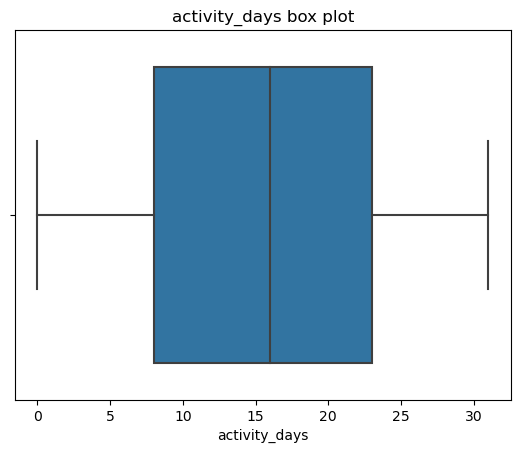

In [34]:
# Box plot
sns.boxplot(x=df0['activity_days'], fliersize=1)
plt.title('activity_days box plot');

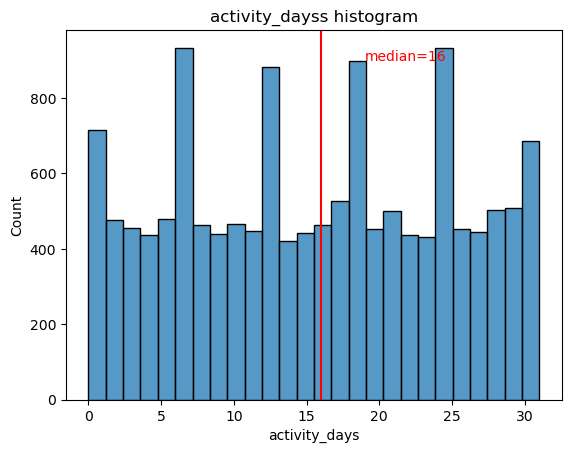

In [38]:
# Histogram
sns.histplot(df0['activity_days'])
median = df0['activity_days'].median()
plt.axvline(median, color='red', linestyle='-')
plt.text(19,900, 'median=16', color='red')
plt.title('activity_dayss histogram');

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~ 750 people who didn't open the app at all and ~ 750 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the sessions distribution, which you might think would be closely correlated with activity_days

#### driving_days column
Number of days the user drives (at least 1 km) during the month

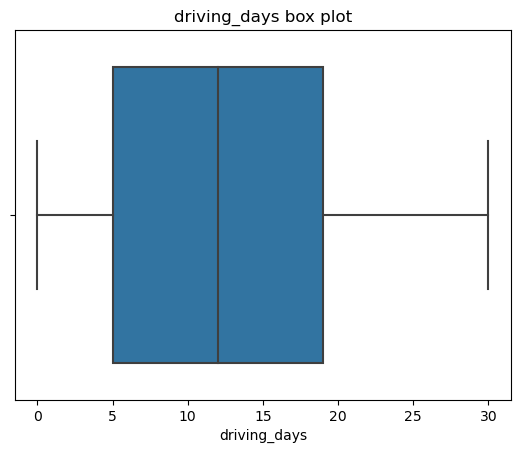

In [40]:
# Box plot
sns.boxplot(x=df0['driving_days'], fliersize=1)
plt.title('driving_days box plot');

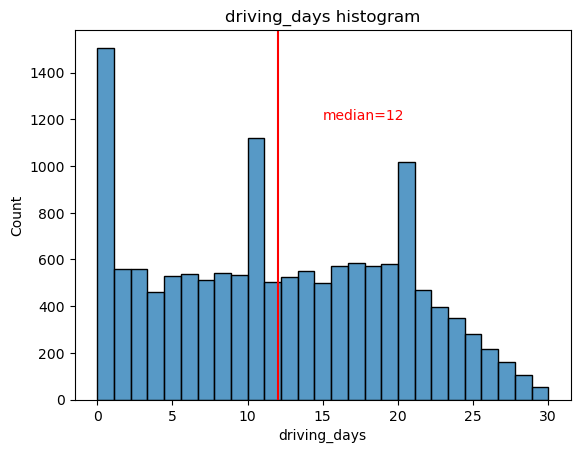

In [42]:
# Histogram
sns.histplot(df0['driving_days'])
median = df0['driving_days'].median()
plt.axvline(median, color='red', linestyle='-')
plt.text(15,1200, 'median=12', color='red')
plt.title('driving_days histogram');

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the driving_days distribution tails off on the right.

However, there were almost twice as many users (~ 1,000 vs. ~ 550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from activity_days. That variable had ~ 500 users opening the app on each of most of the day counts, but there were only ~ 750 users who did not open the app at all during the month and ~ 750 users who opened the app every day. 

#### device column
The type of device a user starts a session with

This is a categorical variable, so you do not plot a box plot for it.

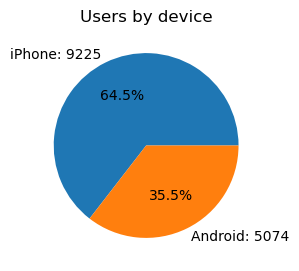

In [43]:
# Pie chart
fig = plt.figure(figsize=(3,3))
data=df0['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

There are nearly twice as many iPhone users as Android users represented in this data.

#### label column
Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month

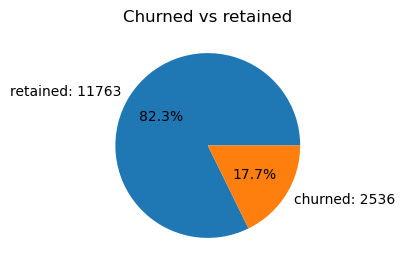

In [44]:
# Pie chart
fig = plt.figure(figsize=(3,3))
data=df0['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Churned vs retained');

Less than 18% of the users churned.

#### driving_days vs. activity_days
Because both driving_days and activity_days represent counts of days over a month and they're also closely related, we can plot them together on a single histogram. This will help to better understand how they relate to each other

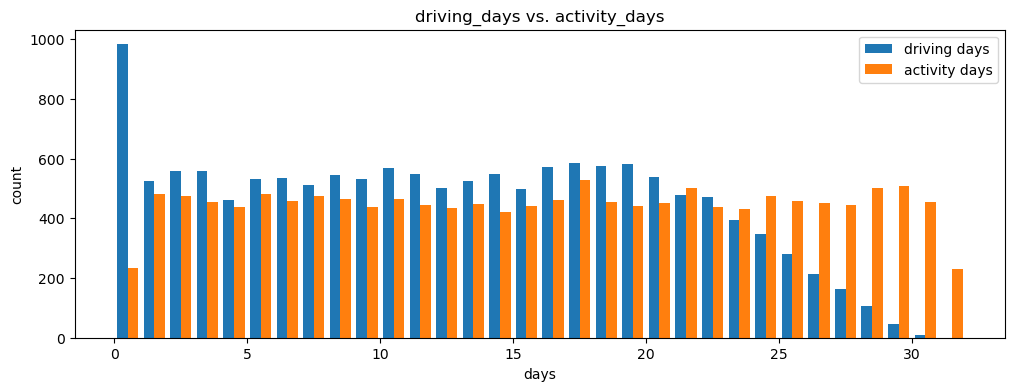

In [46]:
# Histogram
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df0['driving_days'], df0['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

As observed previously, this might seem counterintuitive. After all, why are there fewer people who didn't use the app at all during the month and more people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive—perhaps to check drive times or route information, to update settings, or even just by mistake.

It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

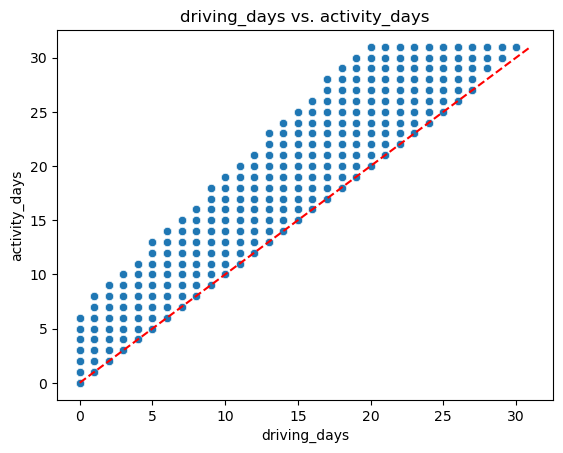

In [47]:
# Scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

####  Retention by device
A histogram that has four bars—one for each device-label combination—to show how many iPhone users were retained/churned and how

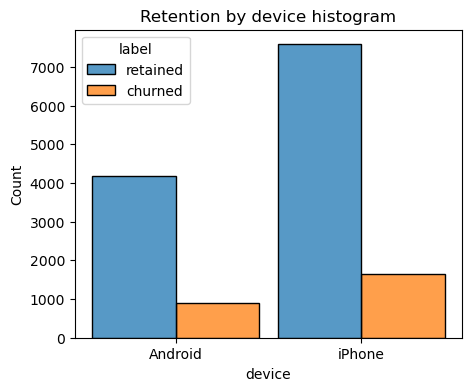

In [48]:
# Histogram
plt.figure(figsize=(5,4))
sns.histplot(data=df0,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

The proportion of churned users to retained users is consistent between device types.

####  Retention by kilometers driven per driving day
we'll create a new column in df0 called km_per_driving_day, which represents the mean distance driven per driving day for each user.

In [49]:
# 1. Create `km_per_driving_day` column
df0['km_per_driving_day'] = df0['driven_km_drives'] / df0['driving_days']
# 2. Call `describe()` on the new column
### YOUR CODE HERE ###
df0['km_per_driving_day'].describe()

C:\Users\Juls\AppData\Local\Temp\ipykernel_7528\1142141177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['km_per_driving_day'] = df0['driven_km_drives'] / df0['driving_days']


count    1.429900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.675616e+02
50%      3.241789e+02
75%      7.608293e+02
max               inf
Name: km_per_driving_day, dtype: float64

The mean value is infinity, the standard deviation is NaN, and the max value is infinity. 

This is the result of there being values of zero in the driving_days column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

We'll convert these values from infinity to zero. 


In [51]:
# 1. Convert infinite values to zero
df0['km_per_driving_day'].loc[df0['km_per_driving_day']==np.inf] = 0

# 2. Confirm that it worked
df0['km_per_driving_day'].describe()

C:\Users\Juls\AppData\Local\Temp\ipykernel_7528\2592013029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['km_per_driving_day'].loc[df0['km_per_driving_day']==np.inf] = 0


count    14299.000000
mean       581.942399
std       1038.254509
min          0.000000
25%        136.168003
50%        273.301012
75%        558.018761
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers per drive day. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

A histogram of the new km_per_driving_day column, disregarding those users with values greater than 1,200 km.  one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. 

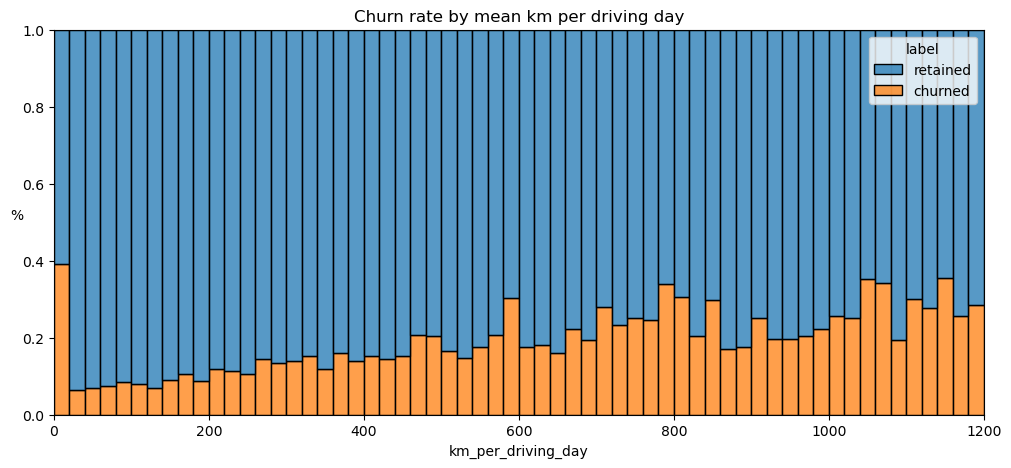

In [53]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df0,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

The churn rate tends to increase as the mean daily distance driven increases, It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### Churn rate per number of driving days
we'll create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

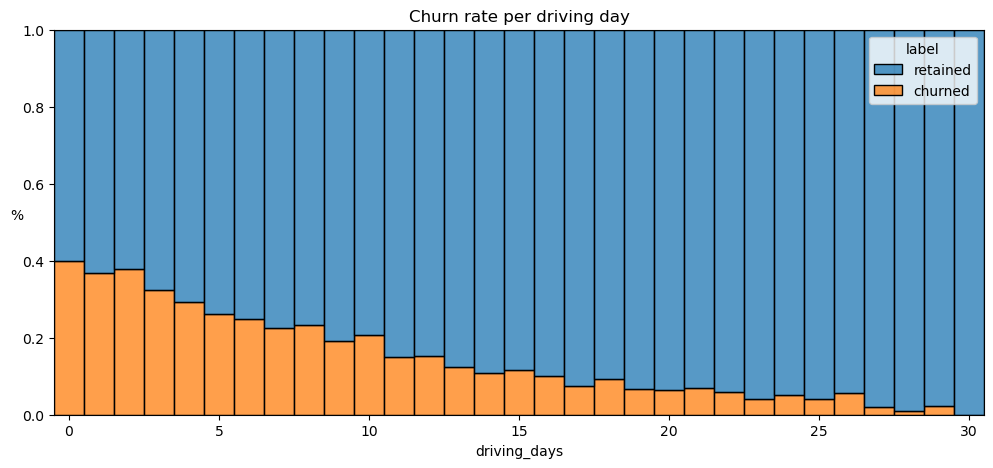

In [54]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df0,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### Proportion of sessions that occurred in the last month
We'll create a new column percent_sessions_in_last_month that represents the percentage of each user's total sessions that were logged in their last month of use.

In [57]:
df0['percent_sessions_in_last_month'] = df0['sessions'] / df0['total_sessions']
df0['percent_sessions_in_last_month'].median()

C:\Users\Juls\AppData\Local\Temp\ipykernel_7528\3266261954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['percent_sessions_in_last_month'] = df0['sessions'] / df0['total_sessions']


0.4243102549137284

Now, we'll create a histogram depicting the distribution of values in this new column.

Median: 0.4


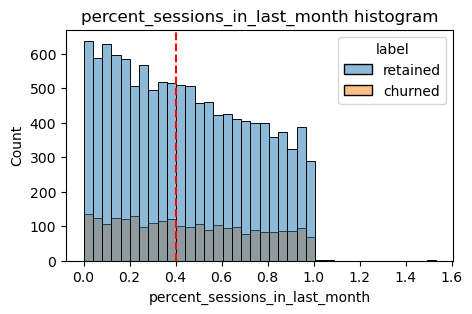

In [58]:
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df0[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df0[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');
    
histogrammer('percent_sessions_in_last_month',
             hue=df['label'],
             multiple='layer',
             median_text=False)

We'll check the median value of the n_days_after_onboarding variable.

In [61]:
df0['n_days_after_onboarding'].median()

1749.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

We're going to make a histogram of n_days_after_onboarding for just the people who had 40% or more of their total sessions in the last month.

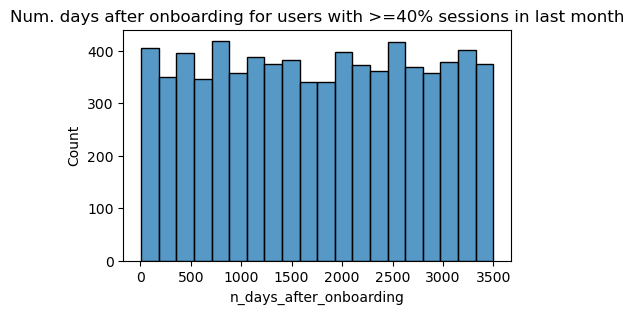

In [62]:
# Histogram
data = df0.loc[df0['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange.

###  Handling outliers
The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

We'll performing impute outlying data with more reasonable values. this imputation is to set a threshold based on a percentile of the distribution.

In [64]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df0[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df0.loc[df0[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

Next, we'll apply that function to the following columns that contain outliers:
* sessions
* drives
* total_sessions
* driven_km_drives
* duration_minutes_drives

In [65]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 200.0
           total_sessions | percentile: 0.95 | threshold: 455.4394923899998
         driven_km_drives | percentile: 0.95 | threshold: 8898.716274999999
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.180091799999


In [66]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


Analysis revealed that the overall churn rate is ~17%, and that this rate is consistent between iPhone users and Android users. Also, EDA has revealed that users who drive very long distances on their driving days are more likely to churn, but users who drive more often are less likely to churn.



## Conclusion
1. Nearly all the variables were either very right-skewed or uniformly distributed. For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable. For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable.
2. Most of the data was not problematic, and there was no indication that any single variable was completely wrong. However, several variables had highly improbable or perhaps even impossible outlying values, such as driven_km_drives. Some of the monthly variables also might be problematic, such as activity_days and driving_days, because one has a max value of 31 while the other has a max value of 30, indicating that data collection might not have occurred in the same month for both of these variables.
3. Less than 18% of users churned, and ~82% were retained.
4. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.
5. Users of all tenures from brand new to ~10 years were relatively evenly represented in the data. This is borne out by the histogram for n_days_after_onboarding, which reveals a uniform distribution for this variable.